<a href="https://colab.research.google.com/github/SOTASHE/googleColabNotebook/blob/main/Mabalabala_219159335_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # python library that allows us to read csv files
import matplotlib.pyplot as plt # python library that allows us to plot graphs and plots
import numpy as np # python library reads numbers
from datetime import datetime # library that reads date and time

import cartopy.crs as ccrs

import seaborn as sns

import sys
import warnings
from sklearn.cluster import KMeans
import lightgbm as lgb
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.stats import skew

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset1 = pd.read_csv('drive/MyDrive/StHelena_chlorophyll_a.csv') #filename with directory


In [ ]:
dataset2 = pd.read_csv('drive/MyDrive/StHelena_SST.csv') #file name with directory



In [ ]:
df1 = pd.DataFrame(data=dataset1)
df1

,date,file,lon,lat,variable,time_start,time_end,pixel_count,valid,invalid,min,max,mean,median,std,pixel_value
0,2021-01-01 00:10:01+00:00,A20210012021031.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-01-01T00:10:01Z,2021-02-01T02:59:59Z,25,20,5,3.645003,10.496118,6.670860,6.984722,1.289543,8.201270
1,2021-02-01 00:05:01+00:00,A20210322021059.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-02-01T00:05:01Z,2021-03-01T02:24:59Z,25,22,3,6.024967,44.577179,21.132184,24.207901,1.659343,31.641537
2,2021-03-01 00:25:01+00:00,A20210602021090.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-03-01T00:25:01Z,2021-04-01T02:49:59Z,25,22,3,5.681921,12.070190,7.754351,7.563432,1.234442,7.678107
3,2021-04-01 00:00:01+00:00,A20210912021120.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-04-01T00:00:01Z,2021-05-01T02:59:59Z,25,22,3,11.943385,19.485899,14.032676,13.679659,1.149090,13.090506
4,2021-05-01 00:00:00+00:00,A20211212021151.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-05-01T00:00:00Z,2021-06-01T02:49:59Z,25,22,3,5.402252,21.069571,12.160533,13.604564,1.393043,10.515401
5,2021-06-01 00:45:01+00:00,A20211522021181.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-06-01T00:45:01Z,2021-07-01T02:59:59Z,25,23,2,3.568676,19.141068,8.653898,9.840005,1.657367,6.727509
6,2021-07-01 00:55:01+00:00,A20211822021212.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-07-01T00:55:01Z,2021-08-01T02:20:00Z,25,23,2,3.259941,5.450862,4.250464,4.299270,1.184813,4.006038
7,2021-08-01 00:20:00+00:00,A20212132021243.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-08-01T00:20:00Z,2021-09-01T02:45:00Z,25,22,3,4.089414,36.551056,16.017671,17.975903,1.659983,11.248755
8,2021-09-01 00:45:00+00:00,A20212442021273.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-09-01T00:45:00Z,2021-10-01T02:55:00Z,25,22,3,4.401735,18.827591,11.691716,12.739002,1.509761,12.391887
9,2021-10-01 00:00:00+00:00,A20212742021304.L3m_MO_CHL.x_chlor_a.nc,18.1,-32.7,chlor_a,2021-10-01T00:00:00Z,2021-11-01T02:19:59Z,25,20,5,7.454449,22.888996,12.028498,11.822099,1.394621,13.064984


In [ ]:
df2 = pd.DataFrame(data=dataset2)
df2

,date,file,lon,lat,variable,time_start,time_end,pixel_count,valid,invalid,min,max,mean,median,std,pixel_value
0,2021-01-01 00:10:01+00:00,AQUA_MODIS.20210101_20210131.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-01-01T00:10:01Z,2021-02-01T02:59:59Z,25,24,1,15.915000,16.994999,16.340624,16.272499,0.261089,16.490000
1,2021-02-01 00:05:01+00:00,AQUA_MODIS.20210201_20210228.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-02-01T00:05:01Z,2021-03-01T02:24:59Z,25,24,1,14.705000,15.745000,15.200417,15.219999,0.228377,15.250000
2,2021-03-01 00:25:01+00:00,AQUA_MODIS.20210301_20210331.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-03-01T00:25:01Z,2021-04-01T02:49:59Z,25,24,1,16.654999,17.969999,16.923540,16.830000,0.271483,16.779999
3,2021-04-01 00:00:01+00:00,AQUA_MODIS.20210401_20210430.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-04-01T00:00:01Z,2021-05-01T02:59:59Z,25,24,1,15.455000,17.670000,15.979167,15.895000,0.445474,15.974999
4,2021-05-01 00:00:00+00:00,AQUA_MODIS.20210501_20210531.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-05-01T00:00:00Z,2021-06-01T02:49:59Z,25,24,1,14.639999,15.125000,14.838542,14.809999,0.140916,14.934999
5,2021-06-01 00:45:01+00:00,AQUA_MODIS.20210601_20210630.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-06-01T00:45:01Z,2021-07-01T02:59:59Z,25,24,1,14.275000,15.255000,14.724583,14.702499,0.276737,14.710000
6,2021-07-01 00:55:01+00:00,AQUA_MODIS.20210701_20210731.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-07-01T00:55:01Z,2021-08-01T02:20:00Z,25,24,1,13.790000,14.469999,14.140208,14.142500,0.188771,14.165000
7,2021-08-01 00:20:00+00:00,AQUA_MODIS.20210801_20210831.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-08-01T00:20:00Z,2021-09-01T02:45:00Z,25,24,1,13.895000,14.630000,14.189583,14.137500,0.198625,14.200000
8,2021-09-01 00:45:00+00:00,AQUA_MODIS.20210901_20210930.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-09-01T00:45:00Z,2021-10-01T02:55:00Z,25,24,1,14.440000,15.665000,14.723750,14.690000,0.236345,14.700000
9,2021-10-01 00:00:00+00:00,AQUA_MODIS.20211001_20211031.L3m.MO.SST.x_sst.nc,18.1,-32.7,sst,2021-10-01T00:00:00Z,2021-11-01T02:19:59Z,25,24,1,14.264999,16.594999,15.499583,15.485000,0.396844,15.684999


In [ ]:
print(df1.columns) # printing columns from the Chlorophyll a dataset 

Index(['date', 'file', 'lon', 'lat', 'variable', 'time_start', 'time_end',
       'pixel_count', 'valid', 'invalid', 'min', 'max', 'median', 'std',
       'pixel_value'],
      dtype='object')


In [ ]:
print(df2.columns) # printing columns from the SST dataset

Index(['date', 'file', 'lon', 'lat', 'variable', 'time_start', 'time_end',
       'pixel_count', 'valid', 'invalid', 'min', 'max', 'median', 'std',
       'pixel_value'],
      dtype='object')


In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index('mean')
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('mean')

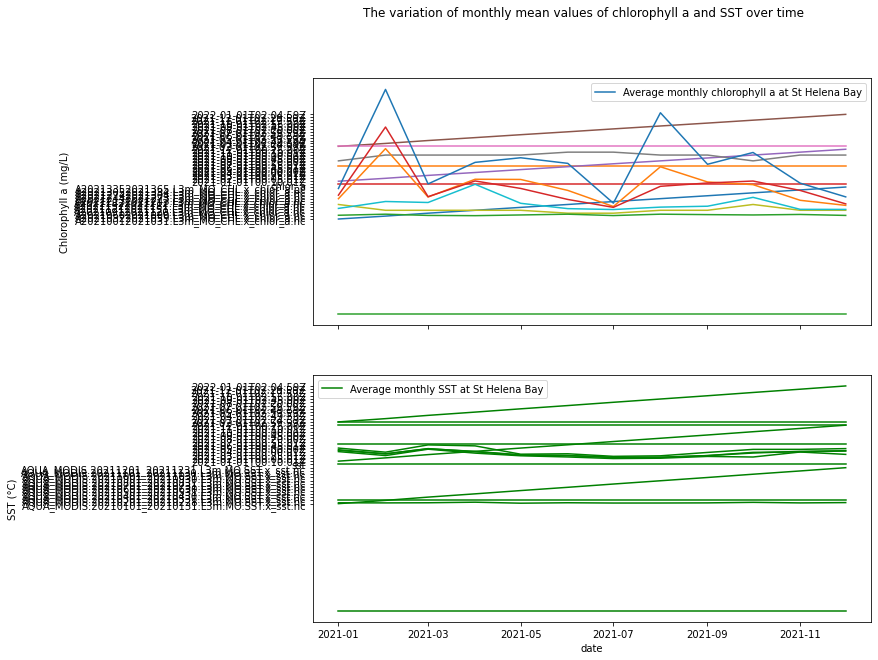

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10), sharex=True)
for col in df1.columns[1:]:
    ax1.plot(df1['date'], df1[col])
    ax2.plot(df2['date'], df2[col], color = 'green')
    fig.suptitle('The variation of monthly mean values of chlorophyll a and SST over time')
    ax1.legend(['Average monthly chlorophyll a at St Helena Bay'])
    ax2.legend(['Average monthly SST at St Helena Bay'])
    plt.xlabel('date')
    ax1.set_ylabel('Chlorophyll a (mg/L)')
    ax2.set_ylabel('SST (°C)')

